In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nbClusters = "2"
nbLiars = "2"
filename =nbLiars + "_liar_size_imbalance_" + nbClusters+ "_with_suspects"

In [3]:
data= pd.read_csv("data/clusters/" + filename + ".csv").drop_duplicates()

In [4]:
data[data["liar_caught"] == False][data["N"] == 12]

/home/sabrina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,N,c1,c2,liar_caught
120,12,4,8,False
140,12,3,9,False
160,12,2,10,False
161,12,10,2,False
180,12,1,11,False
181,12,11,1,False


In [5]:
data[["N", "liar_caught"]].groupby(["N", "liar_caught"]).size().unstack(fill_value=0).reset_index()

liar_caught,N,False,True
0,11,8,2
1,12,6,5
2,13,8,4
3,14,10,3
4,15,8,6
5,16,10,5
6,17,12,4
7,18,10,7
8,19,12,6
9,20,14,5


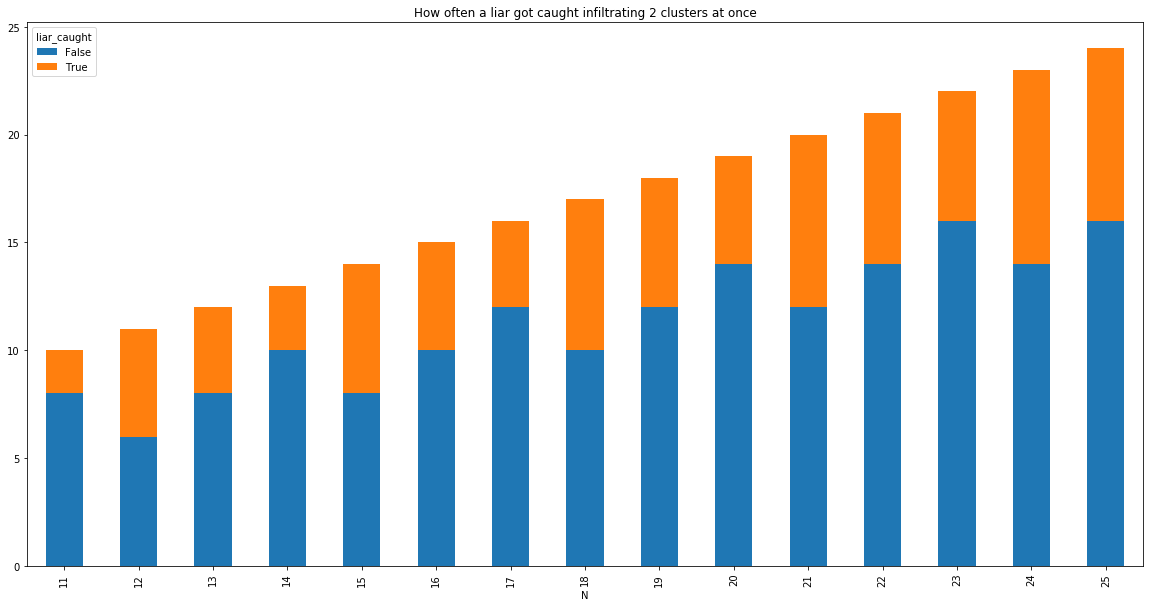

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
data[["N", "liar_caught"]].groupby(["N", "liar_caught"]).size().unstack(fill_value=0).reset_index()\
    .plot.bar(stacked=True, ax=ax, x="N", title="How often a liar got caught infiltrating "+nbClusters+" clusters at once")

In [7]:
fig.savefig('graphs/clusters/'+filename+'.png')

In [8]:
data["imbalance"] = (data["c1"]/data["c2"]).round(2)
data[data["imbalance"] <= 1]

,N,c1,c2,liar_caught,imbalance
0,11,5,6,False,0.83
12,11,4,7,False,0.57
24,11,3,8,False,0.38
36,11,2,9,False,0.22
48,11,1,10,False,0.10
60,12,6,6,True,1.00
100,12,5,7,True,0.71
120,12,4,8,False,0.50
140,12,3,9,False,0.33
160,12,2,10,False,0.20


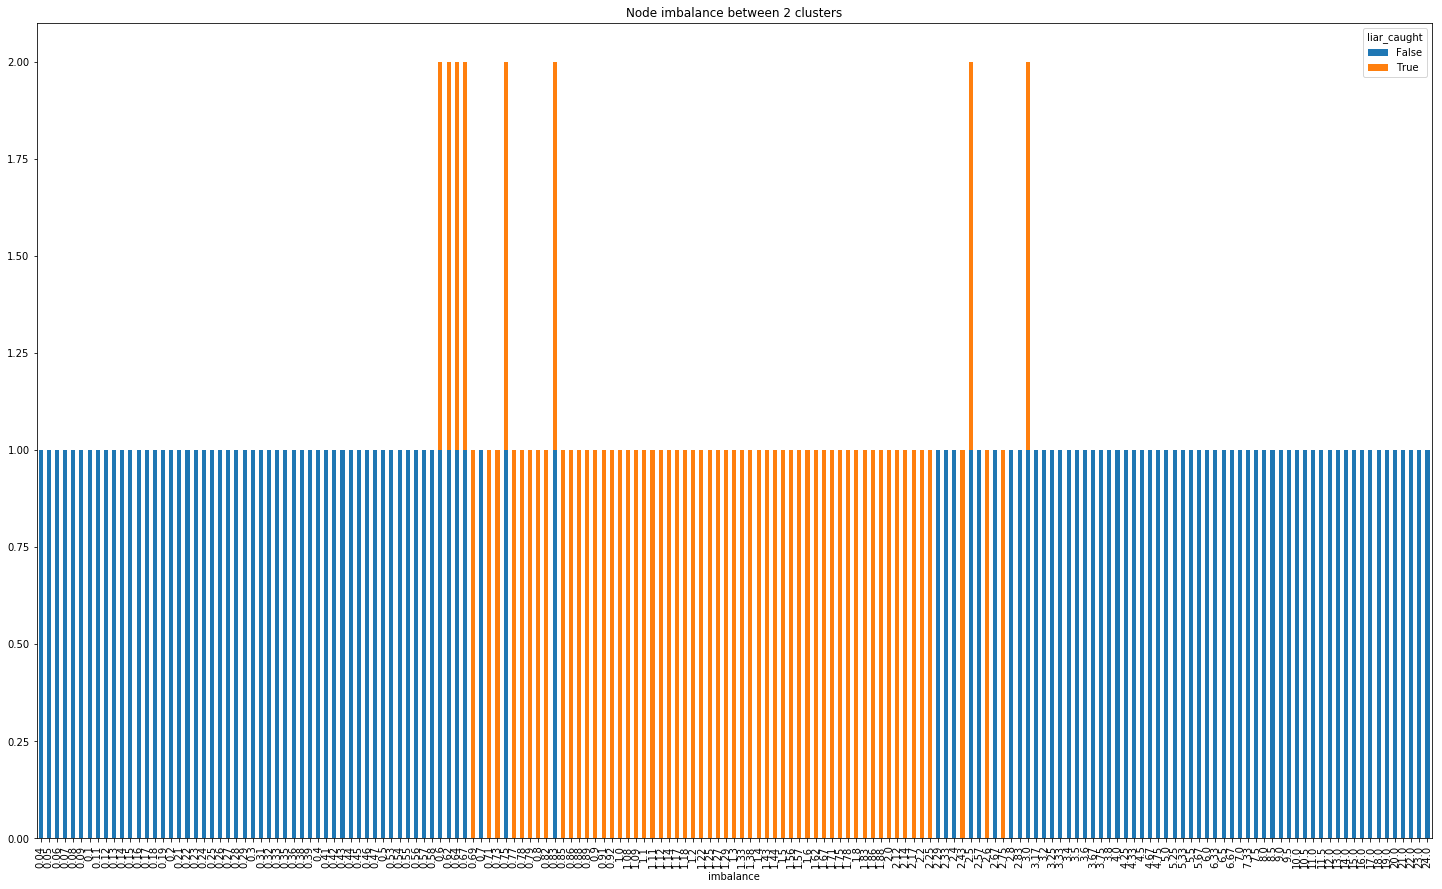

In [9]:
fig1, ax1 = plt.subplots(figsize=(25, 15))
data[["imbalance", "liar_caught"]].drop_duplicates()\
    .groupby(["imbalance", "liar_caught"]).size().unstack(fill_value=0).reset_index()\
    .plot.bar(stacked=True, ax=ax1, x="imbalance", title="Node imbalance between "+nbClusters+" clusters")

In [10]:
fig1.savefig('graphs/clusters/'+filename+'_cluster_ratio.png')